In [244]:
## Name: Abdul Rehman
## Roll Number: 263179034

# **Assignment 1: CSCS460 Machine Learning**


### Introduction

In this assignment, you will be creating your first Machine Learning model from scratch: K-Nearest Neighbors.

This algorithm is one of the simpler ones you will come across, but the ideas can be applied to large-scale sophisticated systems: Semantic Search and Recommendation Systems for starters.

For this assignment, you will be creating your own KNN-classifier from scratch using `numpy`.

You are provided with the Iris flower dataset and will need to:
- Implement the KNN algorithm from scratch (Part 1)
- Evaluate its performance using cross-validation and different distance metrics
- Compare your implementation with a built-in version from `sklearn` (Part 2)

### Instructions

- Follow along with the notebook, filling out the necessary code where instructed.

- <span style="color: red;">Read the Plagiarism Policy of FCCU.</span>

- <span style="color: red;">Make sure to run all cells for credit.</span>

- <span style="color: red;">Do not remove any pre-written code.</span> We will be using the `print` statements to grade your assignment.

- <span style="color: red;">You must attempt all parts.</span> Do not assume that because something is for 0 marks, you can leave it - it will definitely be used in later parts.

- <span style="color: red;">Do not use unauthorized libraries.</span> You are not allowed to use `sklearn` in Part 1. Failure to follow these instructions will result in a serious penalty.

## **Part 1: K-Nearest Neighbors (KNN) from Scratch [75 marks]**
In this you will implement the K-Nearest Neighbors (KNN) algorithm from scratch and apply it to the Iris dataset.

## Dataset: Iris Flower Dataset
The dataset contains 150 samples (50 Each) of 3 iris flowers with 4 features:
- Sepal length
- Sepal width
- Petal length
- Petal width
- Class (species): Setosa, Versicolour, Virginica

## Tasks for Part 1
- Load the dataset
- Implement a train-test split
- Implement the Euclidean and Manhattan distance function
- Write the k-NN classifier
- Evaluate the accuracy
- Display Results

Again, you are <span style="color: red;">not allowed</span> to use scikit-learn or any other machine learning toolkit for this part. You have to implement your own k-NN classifier from scratch.

You can use the following libraries for this part or other standard python libraries:
- `numpy` for numerical operations
- `pandas` for dataset handling
- `matplotlib` for plotting the results

### Importing Libraries

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load the Iris Flower Dataset
You can use the `pandas` library to load the CSV file but the final dataset should be stored in a `numpy` array.

`Features:` SepalLength, SepalWidth, PetalLength, PetalWidth

`Labels:` Species (Setosa, Versicolour, and Virginica)

In [246]:
# Load the dataset
df = pd.read_csv("iris.csv")
# Display the first 5 rows of the dataset
print(df.head())
# Convert to numpy array
df['species'] = df['species'].astype('category').cat.codes
data = df.to_numpy()

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## Step 2: Train-Test Split
You can use the `numpy` to manually split the dataset into training and testing sets (80% train, 20% test). You can shuffle the dataset randomly to avoid any bias in splitting. Separate features and labels to ensure that the model learns only from the input data and that its performance can be evaluated objectively on unseen data.

In [247]:
# Shuffle the dataset
np.random.shuffle(data)
# Split 80% for training and 20% for testing
train_size = int(0.8 * len(data))
# Separate features and labels for both train and test data
X_train, X_test = data[:train_size, :-1], data[train_size:, :-1]
y_train, y_test = data[:train_size, -1], data[train_size:, -1]
# Print the 4 arrays
print("X_train:\n", X_train)
print("------------------------------------------")
print("X_test:\n", X_test)
print("------------------------------------------")
print("y_train:\n", y_train)
print("------------------------------------------")
print("y_test:\n", y_test)
print("------------------------------------------")

X_train:
 [[7.7 2.8 6.7 2. ]
 [6.4 2.7 5.3 1.9]
 [7.2 3.6 6.1 2.5]
 [4.6 3.4 1.4 0.3]
 [5.  3.5 1.3 0.3]
 [6.5 3.2 5.1 2. ]
 [5.2 3.4 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [7.7 3.  6.1 2.3]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.9 0.2]
 [4.9 3.1 1.5 0.1]
 [5.8 2.7 4.1 1. ]
 [5.8 2.7 3.9 1.2]
 [4.4 2.9 1.4 0.2]
 [5.6 2.7 4.2 1.3]
 [6.7 3.1 4.7 1.5]
 [4.7 3.2 1.3 0.2]
 [4.6 3.2 1.4 0.2]
 [5.2 2.7 3.9 1.4]
 [5.9 3.  5.1 1.8]
 [6.1 3.  4.6 1.4]
 [6.3 2.9 5.6 1.8]
 [6.7 3.3 5.7 2.5]
 [5.6 2.8 4.9 2. ]
 [5.6 3.  4.1 1.3]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [6.3 2.5 4.9 1.5]
 [5.  3.3 1.4 0.2]
 [6.4 2.9 4.3 1.3]
 [5.8 2.7 5.1 1.9]
 [4.9 3.1 1.5 0.1]
 [4.8 3.4 1.6 0.2]
 [5.5 2.3 4.  1.3]
 [6.1 2.8 4.  1.3]
 [6.9 3.1 5.4 2.1]
 [6.7 2.5 5.8 1.8]
 [4.6 3.1 1.5 0.2]
 [5.4 3.9 1.7 0.4]
 [6.8 3.2 5.9 2.3]
 [7.4 2.8 6.1 1.9]
 [5.6 2.5 3.9 1.1]
 [5.9 3.  4.2 1.5]
 [7.7 2.6 6.9 2.3]
 [7.9 3.8 6.4 2. ]
 [6.5 3.  5.2 2. ]
 [6.5 2.8 4.6 1.5]
 [6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1. ]
 [5.  3.5 1.6 0.6]
 [5.7 2.9 4.2 1.3]
 [

## Step 3: Implement Distance Function

Implement separate functions for the Euclidean and Manhattan distances. Formulas for both are given below.

$$
d_{\text{Euclidean}}(\vec{p},\vec{q}) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + (p_3 - q_3)^2 + ... + (p_n - q_n)^2}
$$

$$
d_{\text{Manhattan}}(\vec{p},\vec{q}) = |(p_1 - q_1)| + |(p_2 - q_2)| + |(p_3 - q_3)| + ... + |(p_n - q_n)|
$$

In [248]:
# Implement the euclidean distance function
def euclidean_distance(vector1,vector2):
    return np.sqrt(np.sum((vector1 - vector2) ** 2))

# Implement the Manhattan distance function
def manhattan_distance(vector1,vector2):
    return np.sum(np.abs(vector1 - vector2))

## Step 4: k-NN Classifier methods

Complete the following method functions:

1. `fit`

2. `get_neighbours`


3. `predict`

You can make as many helper functions as you need.


In [249]:
class KNNClassifier:
    def __init__(self, k=3):
        """
        Initialize the k-NN classifier with the value of k.

        Parameters:
        k (int): Number of nearest neighbors to consider.
        """
        self.k = k
        self.train_features = None
        self.train_labels = None

In [250]:
def fit(self, features, labels):
        self.train_features = features
        self.train_labels = labels

In [251]:
def get_neighbours(self, test_point, distance_metric):
    distances = []
    for i, train_point in enumerate(self.train_features):
        if distance_metric == 'e':
            distance = euclidean_distance(test_point, train_point)
        elif distance_metric == 'm':
            distance = manhattan_distance(test_point, train_point)
        distances.append((distance, self.train_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_neighbors = [label for _, label in distances[:self.k]]
    return k_neighbors

In [252]:
def predict(self, test_data, distance_metric):
        predictions = []
        for test_point in test_data:
            neighbors = self.get_neighbours(test_point, distance_metric)
            prediction = max(set(neighbors), key=neighbors.count)
            predictions.append(prediction)
        return predictions

## Step 5: Evaluating the Model

Now that you've created a model and "trained" it, you can move on to the Evaluation phase.

- Implement an `evaluate` function that computes the Confusion Matrix, Accuracy, and Macro-Average F1 score of your classifier.
- The function should take as input the predicted labels and the true labels. This will be built in steps: its easier to create a Confusion Matrix, then calculate things like the Precision, Recall and F1 from it.

- We will also implement a function that displays our confusion matrix as a heatmap annotated with the data values.
- The axes should be properly labelled and the colormap used needs to be shown next to the heatmap.
- You can have a look at some examples of heatmaps [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html). (You don't have to use the seaborn libray, but it has some pretty colour palettes to choose from.)

We recommend that you do not use hard coding in this function.

In [253]:
# Implement a function to calculate accuracy

def calculate_accuracy(predicted_labels, true_labels):
    correct = np.sum(predicted_labels == true_labels)
    accuracy = correct / len(true_labels)
    return accuracy

In [254]:
# Implement a function to compute the confusion matrix

def make_confusion_matrix(predicted_labels, true_labels):
    classes = np.unique(true_labels)
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    
    for true, pred in zip(true_labels, predicted_labels):
        matrix[int(true), int(pred)] += 1
        
    return matrix

In [255]:
# Implement a function to display a heatmap
def make_heat_map(data, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

In [256]:
# Implement a function to compute the precision

def calculate_precision(confusion_matrix,class_label):
    tp = confusion_matrix[class_label, class_label]
    fp = np.sum(confusion_matrix[:, class_label]) - tp
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    return precision

In [257]:
# Implement a function to compute the recall

def calculate_recall(confusion_matrix,class_label):
    tp = confusion_matrix[class_label, class_label]
    fn = np.sum(confusion_matrix[class_label, :]) - tp
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    return recall

In [258]:
# Implement a function to compute the F1 score

def calculate_f1_score(precision, recall):
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return f1_score

In [259]:
# Implement a function to compute the Macro-average F1

def macro_average_f1(confusion_matrix):
    num_classes = len(confusion_matrix)
    f1_scores = []

    for class_label in range(num_classes):
        precision = calculate_precision(confusion_matrix, class_label)
        recall = calculate_recall(confusion_matrix, class_label)
        f1 = calculate_f1_score(precision, recall)
        f1_scores.append(f1)

    macro_f1 = np.mean(f1_scores)
    return macro_f1

## Step 6: `k`-fold Cross Validation


Now with the basics done, you can move on to the next step: `k`-fold Cross Validation. This is a more robust way of evaluating your model since it uses all the data for training and testing (effectively giving you `k` chances to verify the generalizability of your model).

Now, implement a function that performs `k`-fold cross-validation on the training data for a specified value of `k`.

In Cross Validation, you divide the dataset into `k` parts. `k-1` parts will be used for training and `1` part will be used for validation. You will repeat this process `k` times, each time using a different part for validation. You will then average the results of each fold to get the final result. Take a look at the image above for a better understanding.

The function should return **predictions** for the **entire training data** (size of list/array should be equal to the size of the dataset). This is the result of appending the predicted labels for each validation-train split into a single list/array. Make sure the order of the predicted labels matches the order of the training dataset, so that they may directly be passed to your `evaluate` function together with the actual labels.

In [260]:
# Implement a function that creates the train and test splits based off the value of k

def k_fold_split(k, cv_no, data):
    fold_size = len(data) // k
    validation_start = cv_no * fold_size
    validation_end = validation_start + fold_size
    validation_set = data[validation_start:validation_end]
    training_set = np.concatenate((data[:validation_start], data[validation_end:]))
    return training_set, validation_set

In [261]:
# Implement function to perform k-fold cross-validation, using the above function

def k_fold_cross_validation(k, dataset, distanceFunction, num_folds=5):
    all_predictions = []
    true_labels = []

    np.random.shuffle(dataset)

    for fold in range(num_folds):
        training_set, validation_set = k_fold_split(num_folds, fold, dataset)
        
        train_features = training_set[:, :-1]
        train_labels = training_set[:, -1]
        val_features = validation_set[:, :-1]
        val_labels = validation_set[:, -1]
        
        knn = KNNClassifier(k=k)
        knn.fit(train_features, train_labels)
        
        fold_predictions = knn.predict(val_features, distanceFunction)

        accuracy = calculate_accuracy(np.array(fold_predictions), val_labels)

        all_predictions.append(accuracy)
        
    # Return mean accuracy and list of fold accuracies
    return np.mean(all_predictions), all_predictions



## Step 7: Running the k-NN Classifier and Evaluating
Now let's predict the test data and evaluate the model.

Euclidean Distance KNN
Accuracy: 1.0000
Macro-Average F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000, F1 Score: 1.0000
Cross-Validation Accuracy: 0.9600 ± 0.0389


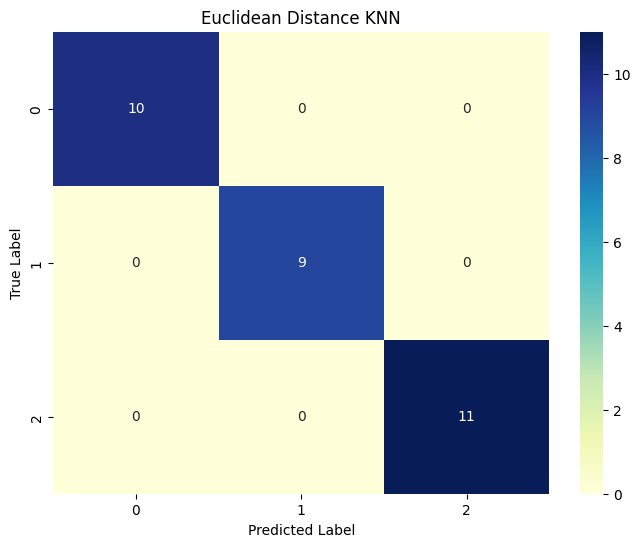

In [262]:
# Euclidean Distance KNN
k = 5
knn_classifier = KNNClassifier(k=k)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test, distance_metric='e')

# Accuracy, Confusion Matrix, and Macro F1
accuracy_e = calculate_accuracy(predictions, y_test)
confusion_matrix_e = make_confusion_matrix(predictions, y_test)
macro_f1_e = macro_average_f1(confusion_matrix_e)

# Precision and Recall
precision_e = calculate_precision(confusion_matrix_e, 0)
recall_e = calculate_recall(confusion_matrix_e, 0) 
f1_e = calculate_f1_score(precision_e, recall_e)
print("Euclidean Distance KNN")
print(f"Accuracy: {accuracy_e:.4f}\nMacro-Average F1 Score: {macro_f1_e:.4f}\nPrecision: {precision_e:.4f}\nRecall: {recall_e:.4f}, F1 Score: {f1_e:.4f}")

cv_accuracy_e, cv_accuracies_e = k_fold_cross_validation(k, data,'e')
print(f"Cross-Validation Accuracy: {cv_accuracy_e:.4f} ± {np.std(cv_accuracies_e):.4f}")
make_heat_map(confusion_matrix_e, title="Euclidean Distance KNN")


Manhattan Distance KNN
Accuracy: 0.9667
Macro-Average F1 Score: 0.9619
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Cross-Validation Accuracy: 0.9733 ± 0.0249


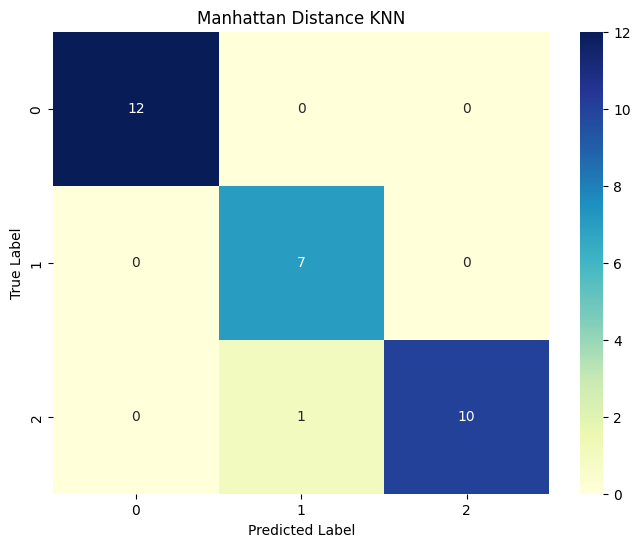

In [263]:
# Manhattan Distance KNN
predictions_m = knn_classifier.predict(X_test,'m')
accuracy_m = calculate_accuracy(predictions_m, y_test)
confusion_matrix_m = make_confusion_matrix(predictions_m, y_test)
macro_f1_m = macro_average_f1(confusion_matrix_m)

# Precision and Recall
precision_m = calculate_precision(confusion_matrix_m, 0)  # Assuming class 0 for precision
recall_m = calculate_recall(confusion_matrix_m, 0)  # Assuming class 0 for recall
f1_m = calculate_f1_score(precision_m, recall_m)
print("Manhattan Distance KNN")
print(f"Accuracy: {accuracy_m:.4f}\nMacro-Average F1 Score: {macro_f1_m:.4f}\nPrecision: {precision_m:.4f}\nRecall: {recall_m:.4f}\nF1 Score: {f1_m:.4f}")

# Cross-validation
cv_accuracy_m, cv_accuracies_m = k_fold_cross_validation(k, data,'m')
print(f"Cross-Validation Accuracy: {cv_accuracy_m:.4f} ± {np.std(cv_accuracies_m):.4f}")
make_heat_map(confusion_matrix_m, title="Manhattan Distance KNN")


## **Part 2: K-Nearest Neighbors (KNN) using Scikit-Learn (25 marks)**
In this part, you have to use [scikit-learn's k-NN implementation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to train and test your classifier on the dataset used in Part 1.

Repeat the tasks you have done in Part 1 but this time using scikit-learn.

## Tasks for Part 2
- Load the dataset
- Preprocess the data by separating the features and labels
- Split the data into training and testing sets.
- Build a k-NN classifier using scikit-learn
- Evaluate the performance using accuracy

### Importing Libraries

In [264]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix as sklearn_confusion_matrix
from sklearn.model_selection import cross_val_score

## Step 1: Load and Preprocess the Dataset

`Features:` SepalLength, SepalWidth, PetalLength, PetalWidth

`Labels:` Species (Setosa, Versicolour, and Virginica)

In [265]:
# Load the Iris dataset
df_s = pd.read_csv("iris.csv")

# Display the first few rows of the dataset
print(df_s.head())

# Separate features and labels
df_s['species'] = df_s['species'].astype('category').cat.codes
X = df_s.drop('species', axis=1)
y = df_s['species']

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## Step 2: Split the Data into Training and Testing Sets

In [266]:
# Split the dataset into training and testing sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 3: k-NN Classifier
Implementation of k-NN using scikit-learn's built-in `KNeighborsClassifier`

In [267]:
# Create an instance of the KNeighborsClassifier with k=3
knn_s = KNeighborsClassifier(n_neighbors=3)
knn_s.fit(X_train_s, y_train_s)
predictions_s = knn_s.predict(X_test_s)

## Step 4: Calculate Accuracy
Calculate and print the accuracy of the scikit-learn k-NN classifier

In [268]:
# Calculate and print the accuracy of the scikit-learn k-NN classifier
accuracy_s = calculate_accuracy(y_test_s, predictions_s)
print(f"Accuracy: {accuracy_s:.4f}")

Accuracy: 1.0000


## Step 5: Evaluate the Model using Cross-Validation
- Perform 5-fold cross-validation on your KNN implementation. Use `k=3` for your initial experiments.
- Evaluate the performance using accuracy.

Scikit-Learn KNN
Accuracy: 1.0000
Macro-Average F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Cross-Validation Score (Scikit-Learn): 0.9667 ± 0.0211


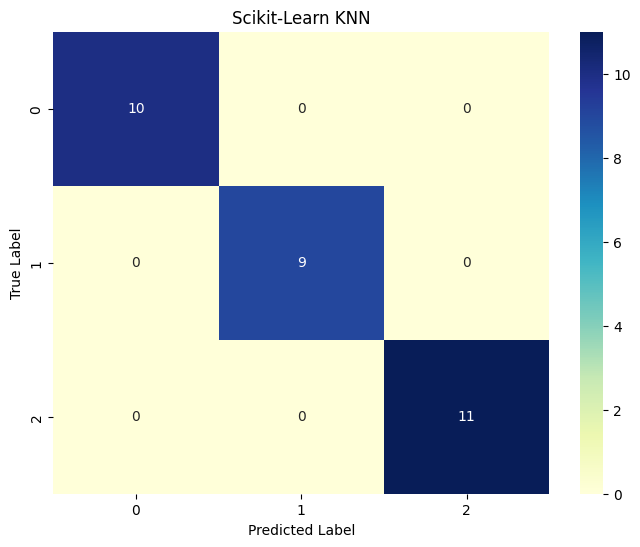

In [269]:
accuracy_s = accuracy_score(y_test_s, predictions_s)
confusion_matrix_s = sklearn_confusion_matrix(y_test_s, predictions_s)
macro_f1_s = macro_average_f1(confusion_matrix_s)

precision_s = calculate_precision(confusion_matrix_s, 0)
recall_s = calculate_recall(confusion_matrix_s, 0)
f1_s = calculate_f1_score(precision_s, recall_s)
print("Scikit-Learn KNN")
print(f"Accuracy: {accuracy_s:.4f}\nMacro-Average F1 Score: {macro_f1_s:.4f}\nPrecision: {precision_s:.4f}\nRecall: {recall_s:.4f}\nF1 Score: {f1_s:.4f}")

cv_scores_s = cross_val_score(knn_s, X, y, cv=5)
print(f"Cross-Validation Score (Scikit-Learn): {cv_scores_s.mean():.4f} ± {cv_scores_s.std():.4f}")
make_heat_map(confusion_matrix_s, title="Scikit-Learn KNN")


## **Conlusion**
- Summarize your findings
    - The custom KNN implementations, both using Euclidean and Manhattan distance metrics, achieved high accuracy scores, showing that all classifiers performed    exceptionally well in terms of handling true positives relative to false positives and false negatives.
    - The built-in Scikit-Learn KNN classifier got a perfect accuracy of 1.0 with consistent high scores across all metrics.

- Which distance metric performed better?
    - The Euclidean distance metric in the custom KNN implementation achieved a slightly higher cross-validation score compared to the Manhattan distance metric.

- How does the performance of your implementation from scratch compare with the built-in KNN classifier?
    - The Scikit-Learn KNN classifier achieved the highest accuracy at 1.0, indicating that it slightly outperforms both custom KNN implementations.
    - Both custom implementations performed very well and achieved results close to Scikit-Learn's, validating the effectiveness of the custom algorithms. However, for the best possible accuracy and efficiency, the Scikit-Learn implementation is advantageous due to its optimization and ease of use in production scenarios. 


In [270]:
# Results summary
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
results = {
    'Metric': ['Accuracy', 'Macro F1 Score', 'Precision', 'Recall', 'F1 Score', 'Cross Validation Score'],
    'Custom KNN (Euclidean)': [round(accuracy_e, 4), round(macro_f1_e, 4), round(precision_e, 4), round(recall_e, 4), round(f1_e, 4), round(cv_accuracy_e, 4)],
    'Custom KNN (Manhattan)': [round(accuracy_m, 4), round(macro_f1_m, 4), round(precision_m, 4), round(recall_m, 4), round(f1_m, 4), round(cv_accuracy_m, 4)],
    'Scikit-Learn KNN': [round(accuracy_s, 4), round(macro_f1_s, 4), round(precision_s, 4), round(recall_s, 4), round(f1_s, 4), round(cv_scores_s.mean(), 4)]
}

results_df = pd.DataFrame(results)

print("Results Summary:")
print(results_df)


Results Summary:
                   Metric  Custom KNN (Euclidean)  Custom KNN (Manhattan)  Scikit-Learn KNN
0                Accuracy                    1.00                  0.9667            1.0000
1          Macro F1 Score                    1.00                  0.9619            1.0000
2               Precision                    1.00                  1.0000            1.0000
3                  Recall                    1.00                  1.0000            1.0000
4                F1 Score                    1.00                  1.0000            1.0000
5  Cross Validation Score                    0.96                  0.9733            0.9667
